In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/IFC-36/Downloads/cars.csv")

In [3]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [4]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
df.tail()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.
260,22.0,6,250,105,3353,15,1977,US.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [7]:
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [8]:
df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

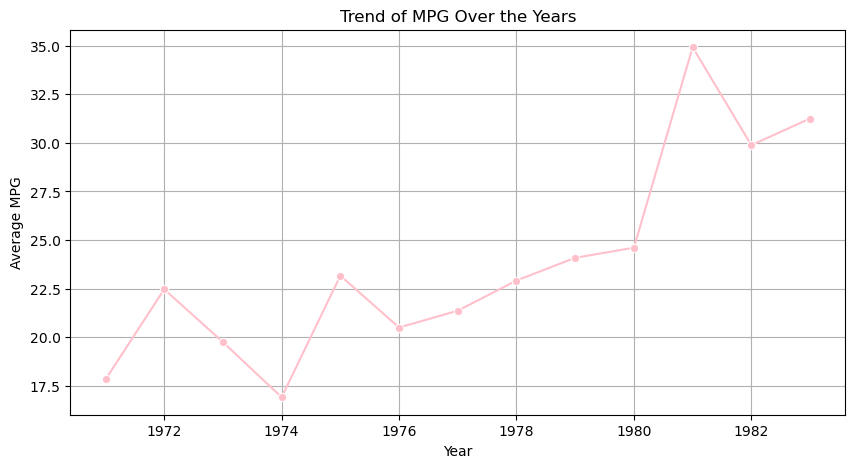

In [20]:
# Trim whitespace from column names
df.columns = df.columns.str.strip()
mpg_trend = df.groupby("year")["mpg"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=mpg_trend.index, y=mpg_trend.values, marker="o", linestyle="-", color="pink")
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.title("Trend of MPG Over the Years")
plt.grid(True)
plt.show()



In [18]:
#2.Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?
df.columns = df.columns.str.strip()
veh_affects=df.groupby("cubicinches")["time-to-60"].mean()
df["cubicinches"] = pd.to_numeric(df["cubicinches"], errors="coerce")
df["time-to-60"] = pd.to_numeric(df["time-to-60"], errors="coerce")
df_cleaned = df.dropna(subset=["cubicinches", "time-to-60"])
correlation = df_cleaned["cubicinches"].corr(df_cleaned["time-to-60"])
correlation



-0.6131991064296582

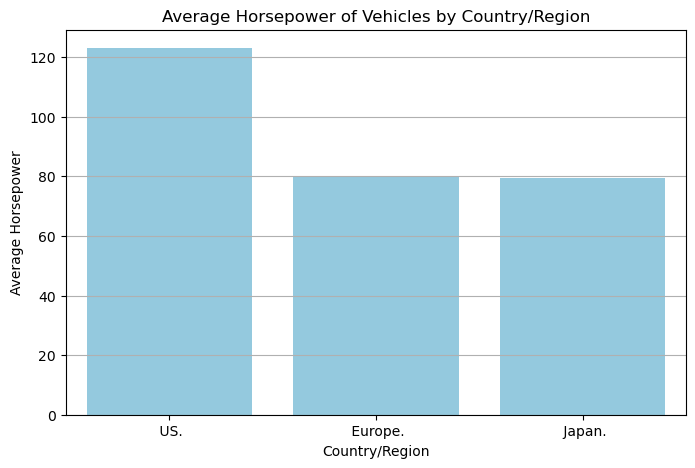

In [28]:
#3.Does a specific country prefer vehicles with more horse power ?
hp_by_country = df_cleaned.groupby("brand")["hp"].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=hp_by_country.index, y=hp_by_country.values,color="skyblue")
plt.xlabel("Country/Region")
plt.ylabel("Average Horsepower")
plt.title("Average Horsepower of Vehicles by Country/Region")
plt.grid(axis="y")
plt.show()




<Axes: xlabel='mpg', ylabel='hp'>

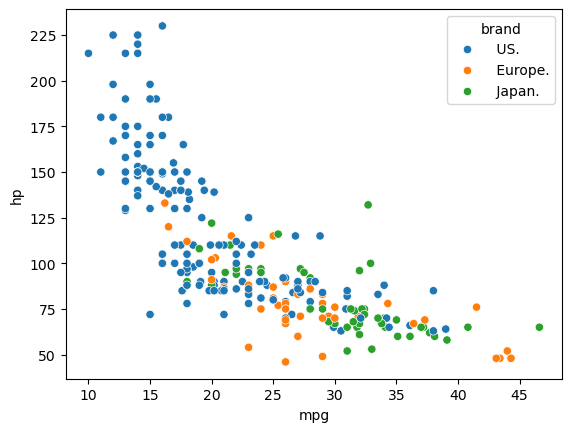

In [94]:
#4.How does the horse power affects the average of the vehicle ?
sns.scatterplot(x = df.mpg ,y = df.hp , hue = df.brand )

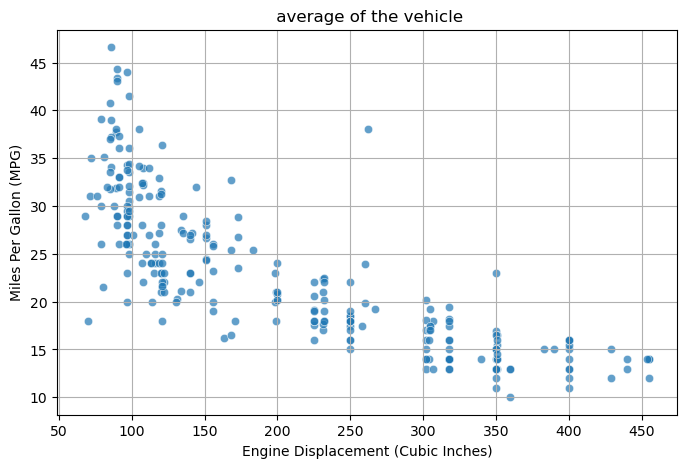

In [42]:
#5.How does the cubic inches affects the average of the vehicle ?
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["cubicinches"], y=df_cleaned["mpg"], alpha=0.7)
plt.xlabel("Engine Displacement (Cubic Inches)")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title(" average of the vehicle")
plt.grid(True)
plt.show()



In [48]:
#6.What is the effect of number of cylinders on the mpg ?
df.columns = df.columns.str.strip()
veh_affects=df.groupby("cylinders")["mpg"].mean()
df["cylinders"] = pd.to_numeric(df["cylinders"], errors="coerce")
df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")
correlation = df_cleaned["cylinders"].corr(df_cleaned["mpg"])
correlation

-0.7771805350407583

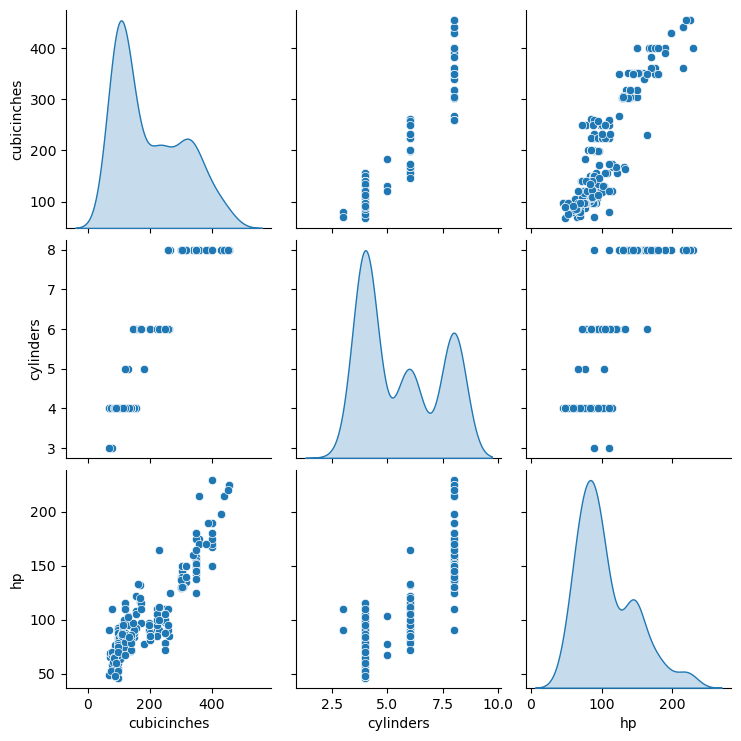

,cubicinches,cylinders,hp
cubicinches,1.000000,0.951452,0.906902
cylinders,0.951452,1.000000,0.846309
hp,0.906902,0.846309,1.000000


In [84]:
#7.What relation between cubic inches , number of cylinders and horse power you can observe from the data ?
sns.pairplot(df_cleaned, vars=["cubicinches", "cylinders", "hp"], diag_kind="kde")
plt.show()
correlation_matrix = df_cleaned[["cubicinches", "cylinders", "hp"]].corr()
correlation_matrix


In [58]:
#8.How much proportion of the total records is occupied by vehicles with 8 cylinders ?
total_records = len(df_cleaned)
eight_cylinder_count = len(df_cleaned[df_cleaned["cylinders"] == 8])
proportion_eight_cylinders = (eight_cylinder_count / total_records) * 100
proportion_eight_cylinders


29.343629343629345

In [62]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [64]:
# Convert weightlbs to numeric.
df["weightlbs"] = pd.to_numeric(df["weightlbs"], errors="coerce")

In [66]:
df["weightlbs"].isna().sum()

3

In [68]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64